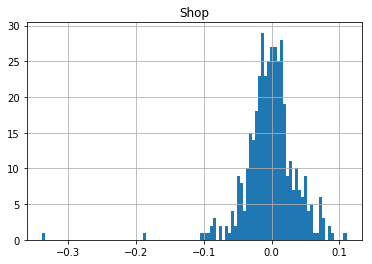

In [7]:
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt

stocks = ['Shop']

startDate = '01/01/2001'
endDate = '01/01/2017'

data = web.DataReader(stocks,data_source='yahoo',start=startDate,end=endDate)['Adj Close']

dailyReturns = (data/data.shift(1))-1
dailyReturns.hist(bins=100)
plt.show()

## Adj Close

It means *Adjusted Close Price*
- The closing price of a stock is the actual price at the close of hte trading day

- Adjusted Closing Price has something to do with Closing Price BUT it takes into account factors such as dividends, stock splits, etc

- Adjusted Close Price is a more accurate reflection of the stock's value!

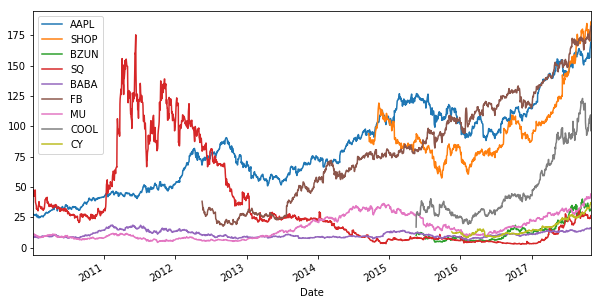

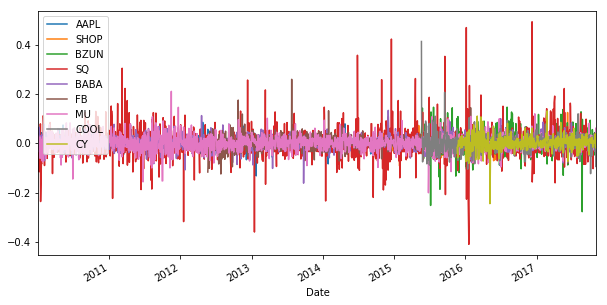

252
AAPL    0.234386
SHOP    0.213787
BZUN    0.461989
SQ     -0.073607
BABA    0.083875
FB      0.282848
MU      0.177882
COOL    0.713786
CY      0.530386
dtype: float64
          AAPL      SHOP      BZUN        SQ      BABA        FB        MU  \
AAPL  0.064803  0.020973  0.026576  0.029062  0.034964  0.020647  0.041627   
SHOP  0.020973  0.097238  0.078666  0.027924  0.037364  0.026136  0.046017   
BZUN  0.026576  0.078666  0.519223  0.060312  0.052573  0.039597  0.083698   
SQ    0.029062  0.027924  0.060312  0.769660  0.044621  0.026292  0.049889   
BABA  0.034964  0.037364  0.052573  0.044621  0.147582  0.026761  0.099603   
FB    0.020647  0.026136  0.039597  0.026292  0.026761  0.135672  0.029553   
MU    0.041627  0.046017  0.083698  0.049889  0.099603  0.029553  0.225832   
COOL  0.030296  0.045791  0.080320  0.061437  0.053771  0.038597  0.072533   
CY    0.019270  0.032867  0.029144  0.077457  0.040099  0.014446  0.058318   

          COOL        CY  
AAPL  0.030296  0.01

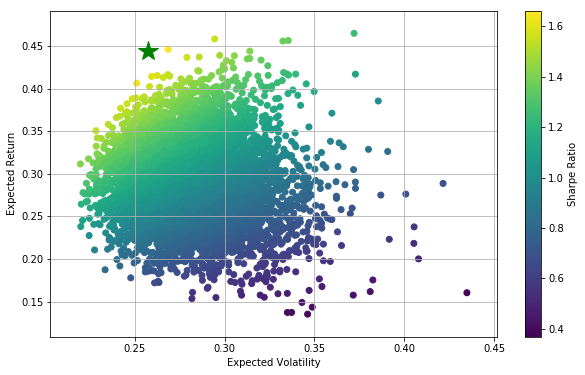

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web
import pandas as pd
import datetime
import scipy.optimize as optimize

#stocks = ['AAPL','WMT','TSLA','GE','AMZN','DB']
stocks = ['AAPL','SHOP','BZUN','SQ','BABA','FB','MU','COOL','CY']
# 'BTCUSD=X'
startDate = '01/01/2010'
#endDate = '01/01/2017'
endDate = '11/05/2017'
#
# Downloads the data from yahoo
def download_data(stocks):
    data = web.DataReader(stocks,data_source="yahoo",start=startDate,end=endDate)['Adj Close']
    data.columns = stocks
    #print(data.tail())
    return data

def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()

# We usually use natural logarithm for normalization purposes
def calculate_returns(data):
    returns = np.log(data/data.shift(1))
    return returns

def plot_daily_returns(returns):
    returns.plot(figsize=(10,5))
    plt.show()

# print out mean and covarience of stocks with [startDate,endDate]. There are 252 trading days in a year
def show_stats(returns):
    days = returns.shape[0]
    days = 252
    print(days)
    print(returns.mean()*days)
    print(returns.cov()*days)
    
def initialize_weights():
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    print("Weights",weights, weights.shape)
    return weights

def calculate_portfolio_returns(returns,weights):
    portfolio_return = np.sum(returns.mean()*weights)*252
    print("Expected portfolio returns:", portfolio_return)

def port_gen(weights, returns):
        weightsT = np.transpose(weights)
        print("Weights - T" , weightsT, weightsT.T.shape)

# expected portfolio varience
def calculate_portfolio_variance(returns, weights):
    portfolio_varience= np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    print("Expected variance:", portfolio_varience)
    
def generate_portfolios(weights,returns):
    preturns = []
    pvariances = []
    
    #Monte-Carlo sim: we generate several random weights -> so random portfolios!
    for i in range(7000):
        weights = np.random.random(len(stocks))
        weights /= np.sum(weights)
        preturns.append(np.sum(returns.mean()*weights)*252)
        pvariances.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights))))
    
    preturns = np.array(preturns)
    pvariances = np.array(pvariances)
    return preturns,pvariances

def plot_plortfolios(returns, variances):
    plt.figure(figsize=(10,6))
    plt.scatter(variances,returns,c=returns/variances, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()
    
def statistics(weights,returns):
    portfolio_return = np.dot(returns.mean()*252,weights.T,)
    #portfolio_return2 = np.sum(returns.mean()*weights)*252
    #print(portfolio_return,"P2",portfolio_return2)
    portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    
    # sharpe Ratio is a measure of returns vs volatility
    sharpe_ratio = portfolio_return/portfolio_volatility
    
    #Returns the three stats!
    return np.array([portfolio_return,portfolio_volatility,sharpe_ratio])

# [2] means that we want to maximize according to the sharpe-ratio
# Note: maximizing f(x)0 function is the same as minimizing -f(x)!
def min_func_sharpe(weights,returns):
    return -statistics(weights,returns)[2]


# What arethe constraints? The sum of weight = 1 (100%). f(x) = 0, this is the function to minimize
def optimize_portfolio(weights,returns):
    constraints=({'type':'eq','fun': lambda x: np.sum(x) - 1}) # the sum of the weeight is 1
    bounds = tuple((0,1) for x in range(len(stocks))) # the weights cab be 1 at most when 100% of money is invested in one stocl
    optimum = optimize.minimize(fun=min_func_sharpe,x0=weights,args=returns,method='SLSQP',bounds=bounds,constraints=constraints)
    return optimum

#  Optimal Portfolio according to weights: 0 means no shares of that company
def print_optimal_portfolio(optimum,returns):
    weights = optimum['x'].round(3)
    print(stocks)
    print("Optimal weights:",weights)
    print("expected return, volatility and Sharpe Ratio:",statistics(weights,returns))
    
def show_optimal_portfolio(optimum, returns, preturns,pvariances):
    plt.figure(figsize=(10,6))
    plt.scatter(pvariances,preturns,c=preturns/pvariances,marker="o")
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(optimum['x'],returns)[1],statistics(optimum['x'],returns)[0],'g*',markersize=20.0)
    plt.show()

if __name__ == "__main__":
    data = download_data(stocks)
    show_data(data)
    returns = calculate_returns(data)
    plot_daily_returns(returns)
    show_stats(returns)
    weights = initialize_weights()
    calculate_portfolio_returns(returns, weights)
    calculate_portfolio_variance(returns, weights)
    vals = generate_portfolios(weights, returns)
    preturns = vals[0]
    pvariances = vals[1]
    #plot_plortfolios(vals[0],vals[1])
    #statistics(weights,returns)
    optimum = optimize_portfolio(weights, returns)
    print_optimal_portfolio(optimum,returns)
    show_optimal_portfolio(optimum,returns,preturns,pvariances)


## Monte-Carlo Simulations

**Monte-Carlo method solves a deterministic problem using probabilistic analog**

1. Define a domain of possible inputs
2. Generate inputs randomly
3. Perform a deterministic computation on the inputs
4. Aggregate the results

We can calculate the area of a circle with Monte-Carlo approach

Just have to generate random points in the plane within [0,a]

Then calculate the points inside and outside the circle: the ratio can yield the area!

**Slow for lower level dimensional problems, but good for HIGH-dimensional tasks**

In [ ]:
def generate_portfolios(weights,returns):
    preturns = []
    pvariances = []
    
    #Monte-Carlo sim: we generate several random weights -> so random portfolios!
    for i in range(10000):
        weights = np.random.random(len(stocks))
        weights /= np.sum(weights)
        preturns.append(np.sum(returns.mean()*weights)*252)
        pvariance.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights))))
    
    preturns = np.array(preturns)
    pvariances = np.arrray(pvariances)
    return preturns,pvariances

def plot_plortfolios(returns, variances):
    plt.figure(figsize=(10,6))
    plt.scatter(variances,returns,c=returns/variances, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()